# **Unemployment Analysis with Python**

In [1]:
#Importing Libraries
#Data Manipulation
import pandas as pd
import numpy as np

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

#Apply some Styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,6)
sns.set_style('whitegrid')

#Filter warnings
import warnings
warnings.filterwarnings('ignore')

**LOADING THE DATASET**

In [2]:
#Reading data
data = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

**EDA**

In [3]:
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [4]:
data.head(3)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74


In [5]:
data.tail(3)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [6]:
data.shape

(267, 9)

In [7]:
fields = data.columns #returns the column names in the dataset
fields

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [8]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [9]:
data.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                           int64
 Estimated Labour Participation Rate (%)    float64
Region.1                                     object
longitude                                   float64
latitude                                    float64
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [11]:
data.nunique()

Region                                       27
 Date                                        10
 Frequency                                    1
 Estimated Unemployment Rate (%)            252
 Estimated Employed                         267
 Estimated Labour Participation Rate (%)    248
Region.1                                      5
longitude                                    27
latitude                                     24
dtype: int64

In [12]:
data.duplicated().sum()

0

In [13]:
data.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [14]:
data.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [15]:
data.rename(columns={'Region.1': 'Area'}, inplace=True)

In [16]:
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [17]:
data.columns = data.columns.str.strip()

In [18]:
data['Date'] = pd.to_datetime(data['Date'])
data.dtypes

Region                                             object
Date                                       datetime64[ns]
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                  int64
Estimated Labour Participation Rate (%)           float64
Area                                               object
longitude                                         float64
latitude                                          float64
dtype: object

In [19]:
data = data.drop('Frequency',axis = 1)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 8 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   267 non-null    object        
 1   Date                                     267 non-null    datetime64[ns]
 2   Estimated Unemployment Rate (%)          267 non-null    float64       
 3   Estimated Employed                       267 non-null    int64         
 4   Estimated Labour Participation Rate (%)  267 non-null    float64       
 5   Area                                     267 non-null    object        
 6   longitude                                267 non-null    float64       
 7   latitude                                 267 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 16.8+ KB


<Axes: >

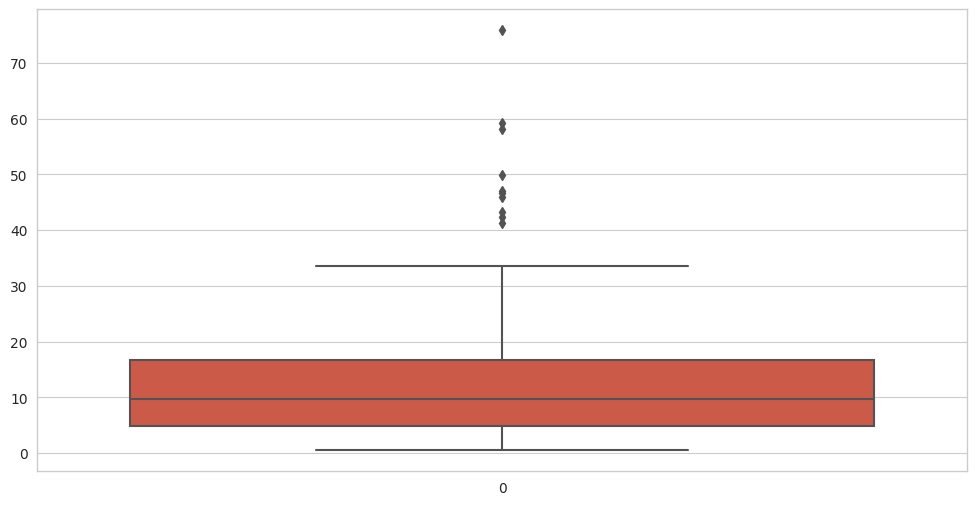

In [21]:
sns.boxplot(data['Estimated Unemployment Rate (%)'])

<Axes: >

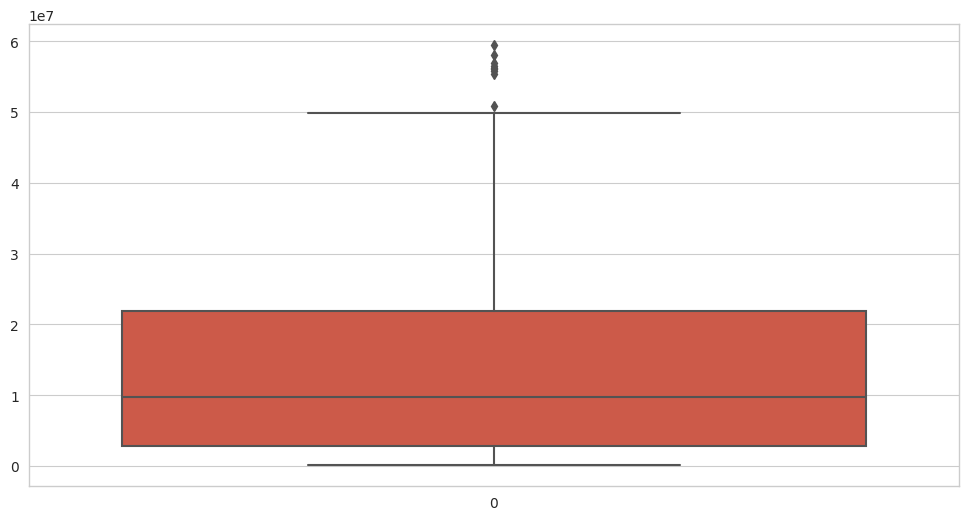

In [22]:
sns.boxplot(data['Estimated Employed'])

<Axes: >

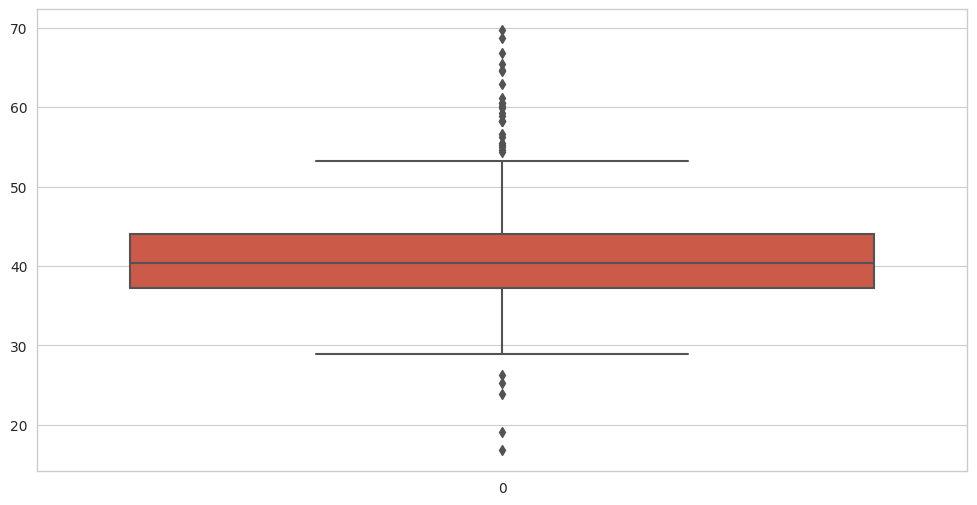

In [23]:
sns.boxplot(data['Estimated Labour Participation Rate (%)'])

1. We have outliers in all the visualization which relates to Unemployment rate and Employed rate.

2. We are only analysing the Unemployment Analysis during Covid 19, so we are not removing any outliers from the data.

<Axes: >

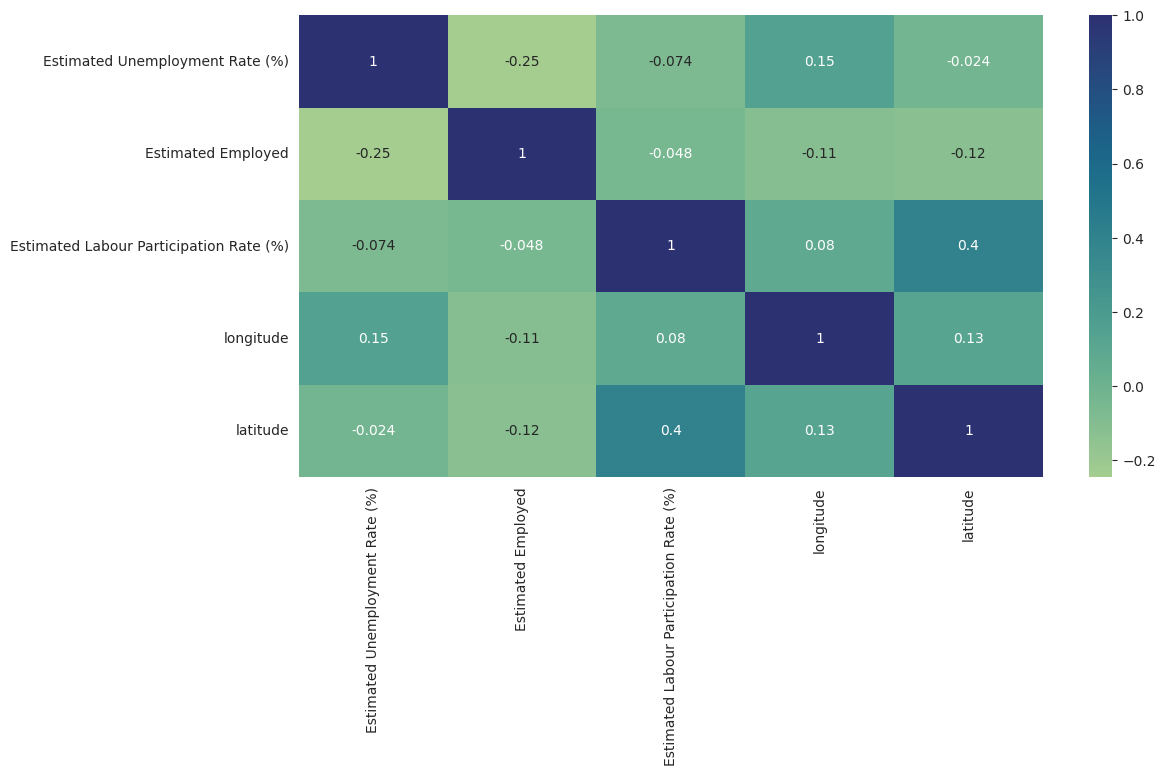

In [24]:
sns.heatmap(data.corr(),  annot=True, cmap='crest')

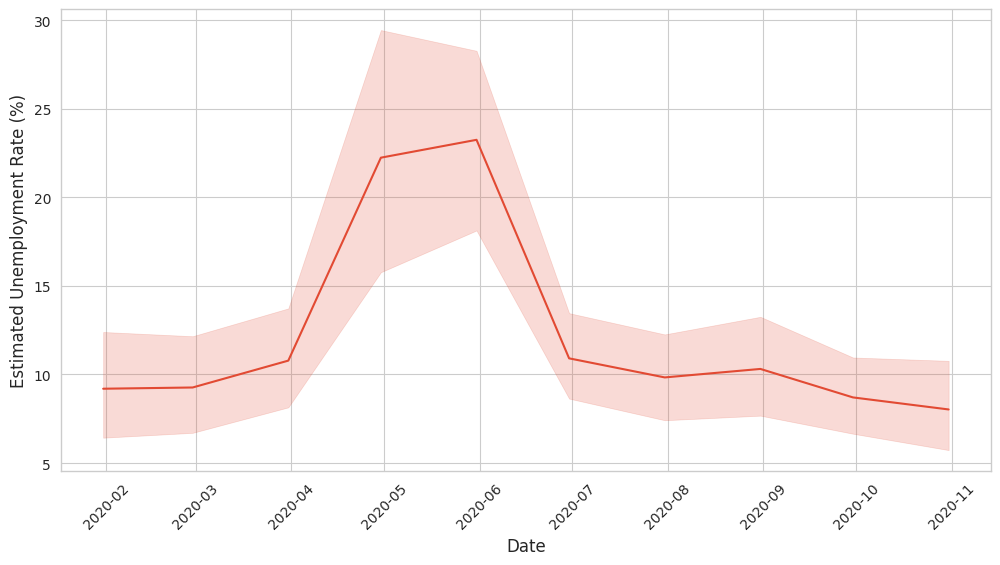

In [25]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Date', y='Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

The above visualization analysis shows that unemployment rate started increasing around April through July. The period during 2020 was lockdown and curfew times which lead to various layoff and job loss in various sectors.

In [26]:
import plotly.express as px
plot_unemp = data[['Estimated Unemployment Rate (%)','Region']]
df_unemployed = plot_unemp.groupby('Region').mean().reset_index()

df_unemployed = df_unemployed.sort_values('Estimated Unemployment Rate (%)')

fig = px.bar(df_unemployed, x='Region',y='Estimated Unemployment Rate (%)',color = 'Region',title = 'Average unemployment rate in each state',
             template='seaborn')
fig.show()

From the above visualization, it can be inferred that the unemployment rate is highest in HARYANA during the period 2020.

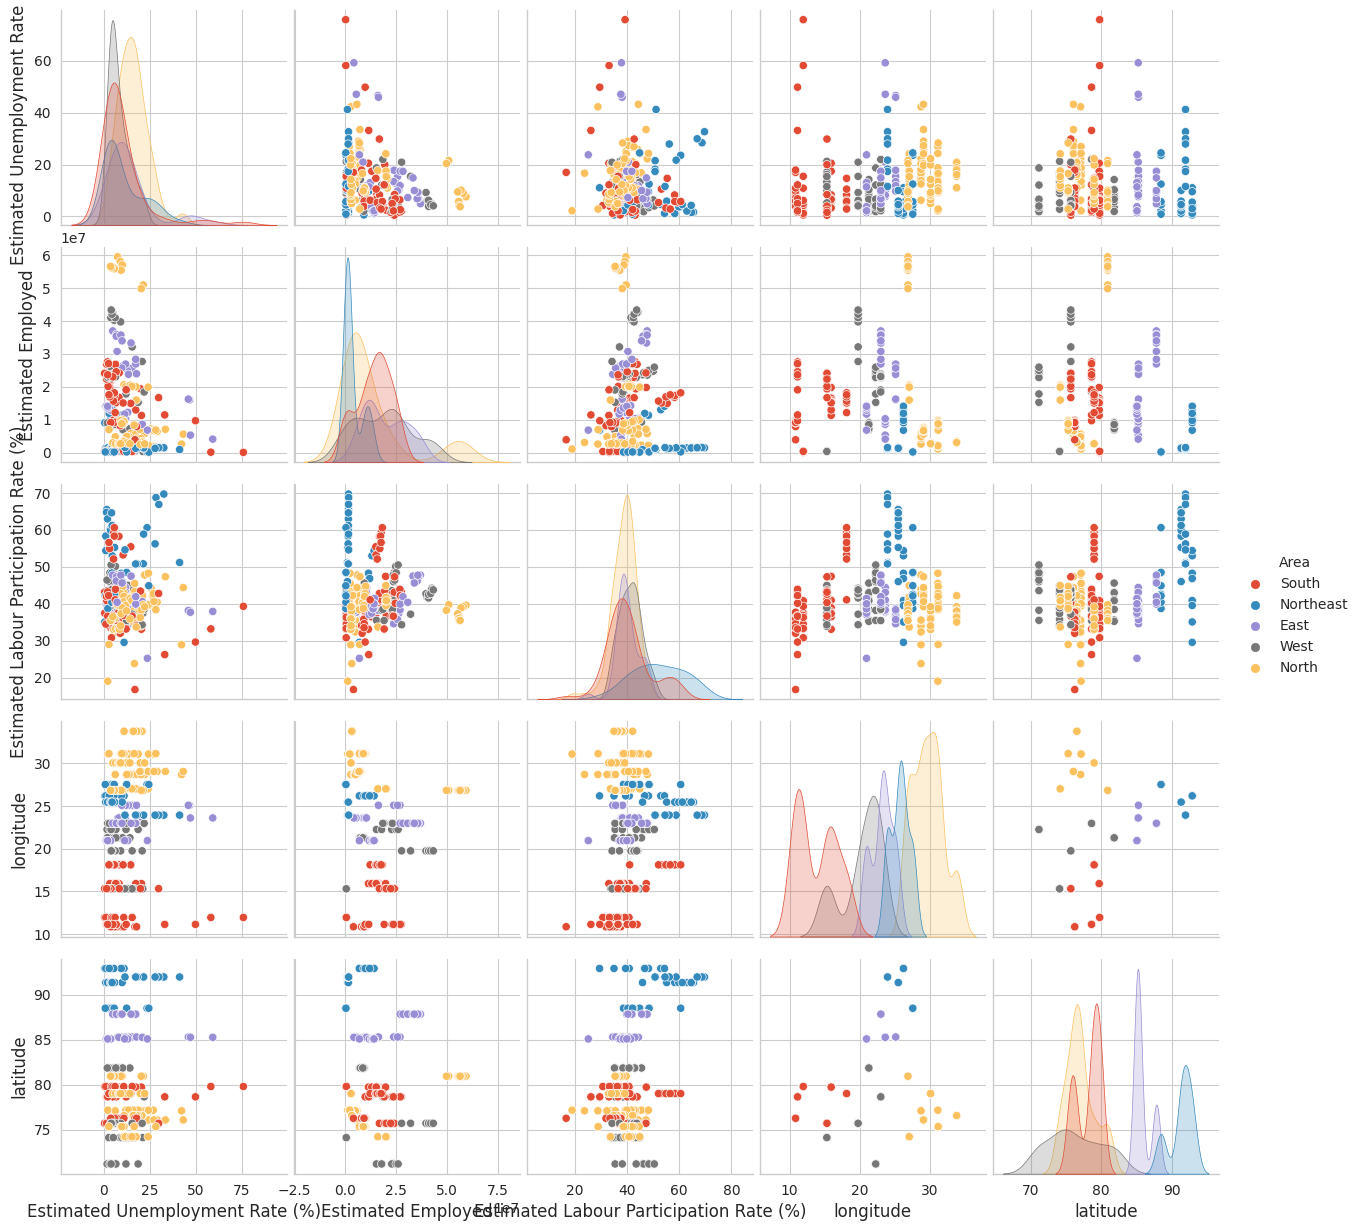

In [27]:
sns.pairplot(data, hue = 'Area')

In [28]:
fig = px.violin(
    data,
    x='Area',
    y='Estimated Unemployment Rate (%)',
    title='Distribution of Unemployment Rates by Areas',
    box=True,  # Include box plot inside the violin
    points='all',  # Show individual data points
)

fig.show()

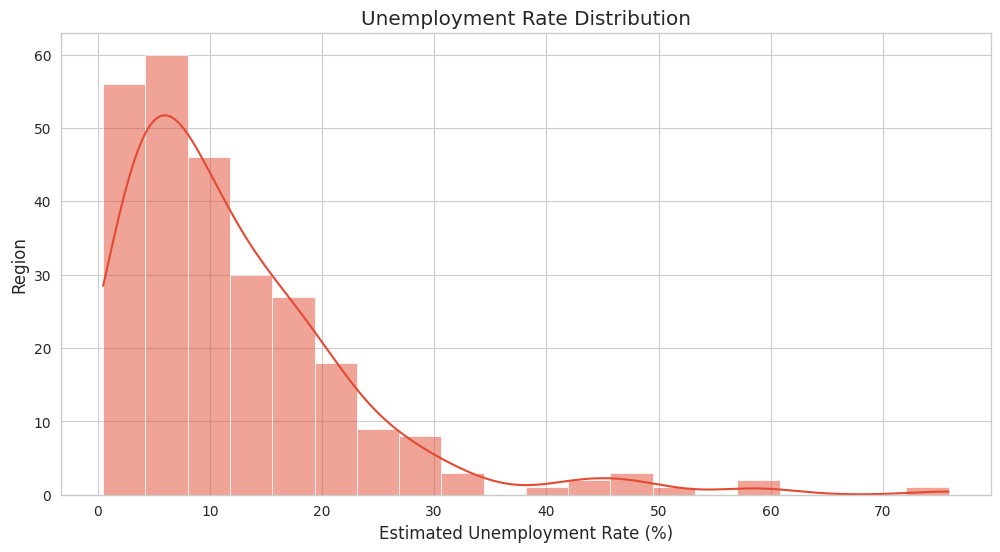

In [29]:
sns.histplot(data['Estimated Unemployment Rate (%)'], bins=20, kde=True)
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Region')
plt.title('Unemployment Rate Distribution')
plt.show()

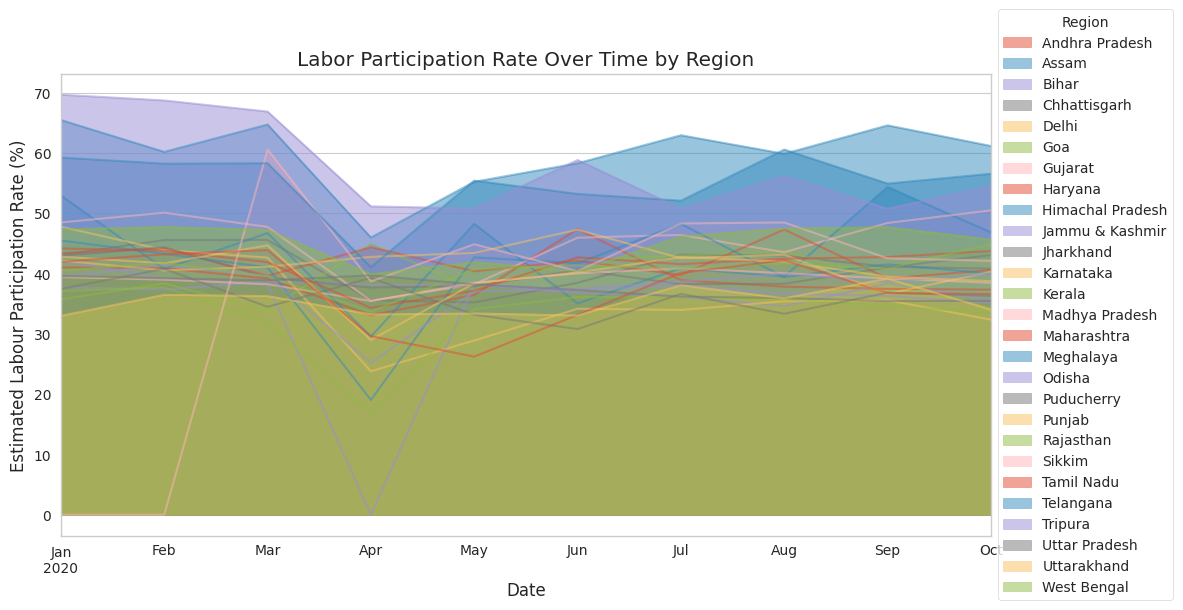

In [30]:
state_area_labor_participation = data.pivot(index='Date', columns='Region', values='Estimated Labour Participation Rate (%)')
state_area_labor_participation.plot(kind='area', stacked=False, alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Estimated Labour Participation Rate (%)')
plt.title('Labor Participation Rate Over Time by Region')
plt.legend(title='Region', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [31]:
data['Month'] = data['Date'].dt.month
data

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,longitude,latitude,Month
0,Andhra Pradesh,2020-01-31,5.48,16635535,41.02,South,15.9129,79.740,1
1,Andhra Pradesh,2020-02-29,5.83,16545652,40.90,South,15.9129,79.740,2
2,Andhra Pradesh,2020-03-31,5.79,15881197,39.18,South,15.9129,79.740,3
3,Andhra Pradesh,2020-04-30,20.51,11336911,33.10,South,15.9129,79.740,4
4,Andhra Pradesh,2020-05-31,17.43,12988845,36.46,South,15.9129,79.740,5
...,...,...,...,...,...,...,...,...,...
262,West Bengal,2020-06-30,7.29,30726310,40.39,East,22.9868,87.855,6
263,West Bengal,2020-07-31,6.83,35372506,46.17,East,22.9868,87.855,7
264,West Bengal,2020-08-31,14.87,33298644,47.48,East,22.9868,87.855,8
265,West Bengal,2020-09-30,9.35,35707239,47.73,East,22.9868,87.855,9


In [32]:
# Calculate average unemployment rate by state
average_unemployment_rate = data.groupby('Region')['Estimated Unemployment Rate (%)']

In [33]:
# Find the state with the highest unemployment rate
state_with_highest_unemployment = average_unemployment_rate.idxmax()
highest_unemployment_rate = average_unemployment_rate.max()

In [34]:
#State with lowest unemployment rate
state_with_lowest_unemployment = average_unemployment_rate.idxmin()
lowest_unemployment_rate = average_unemployment_rate.min()

In [35]:
print("State with the highest unemployment rate:", state_with_highest_unemployment)
print("Highest unemployment rate:", highest_unemployment_rate)

State with the highest unemployment rate: Region
Andhra Pradesh        3
Assam                13
Bihar                23
Chhattisgarh         35
Delhi                44
Goa                  54
Gujarat              63
Haryana              73
Himachal Pradesh     84
Jammu & Kashmir      90
Jharkhand           103
Karnataka           112
Kerala              123
Madhya Pradesh      133
Maharashtra         142
Meghalaya           152
Odisha              162
Puducherry          172
Punjab              183
Rajasthan           198
Sikkim              201
Tamil Nadu          210
Telangana           221
Tripura             230
Uttar Pradesh       240
Uttarakhand         255
West Bengal         260
Name: Estimated Unemployment Rate (%), dtype: int64
Highest unemployment rate: Region
Andhra Pradesh      20.51
Assam               11.06
Bihar               46.64
Chhattisgarh        14.23
Delhi               42.27
Goa                 21.25
Gujarat             18.71
Haryana             43.22
Himachal 

Changes in Unemployment - Before and After Lockdown

In [36]:
# Filter data for months 1 to 3 (before lockdown)
before_lock = data[(data['Month'] >= 1) & (data['Month'] <= 3)][['Region', 'Estimated Unemployment Rate (%)']]

In [37]:
# Filter data for months 3 to 5 (after lockdown)
after_lock = data[(data['Month'] >= 3) & (data['Month'] < 6)][['Region', 'Estimated Unemployment Rate (%)']]

In [38]:
before_lock = before_lock.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index().rename(
    columns={'Estimated Unemployment Rate (%)':'Unemployment Rate before Lock-Down'})

In [39]:
after_lock = after_lock.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index().rename(
    columns={'Estimated Unemployment Rate (%)':'Unemployment Rate after Lock-Down'})

In [40]:
before_lock['Percentage Change in Unemployment'] = round((after_lock['Unemployment Rate after Lock-Down'] - before_lock['Unemployment Rate before Lock-Down']) / before_lock['Unemployment Rate before Lock-Down'], 2)

<Axes: xlabel='Percentage Change in Unemployment', ylabel='Region'>

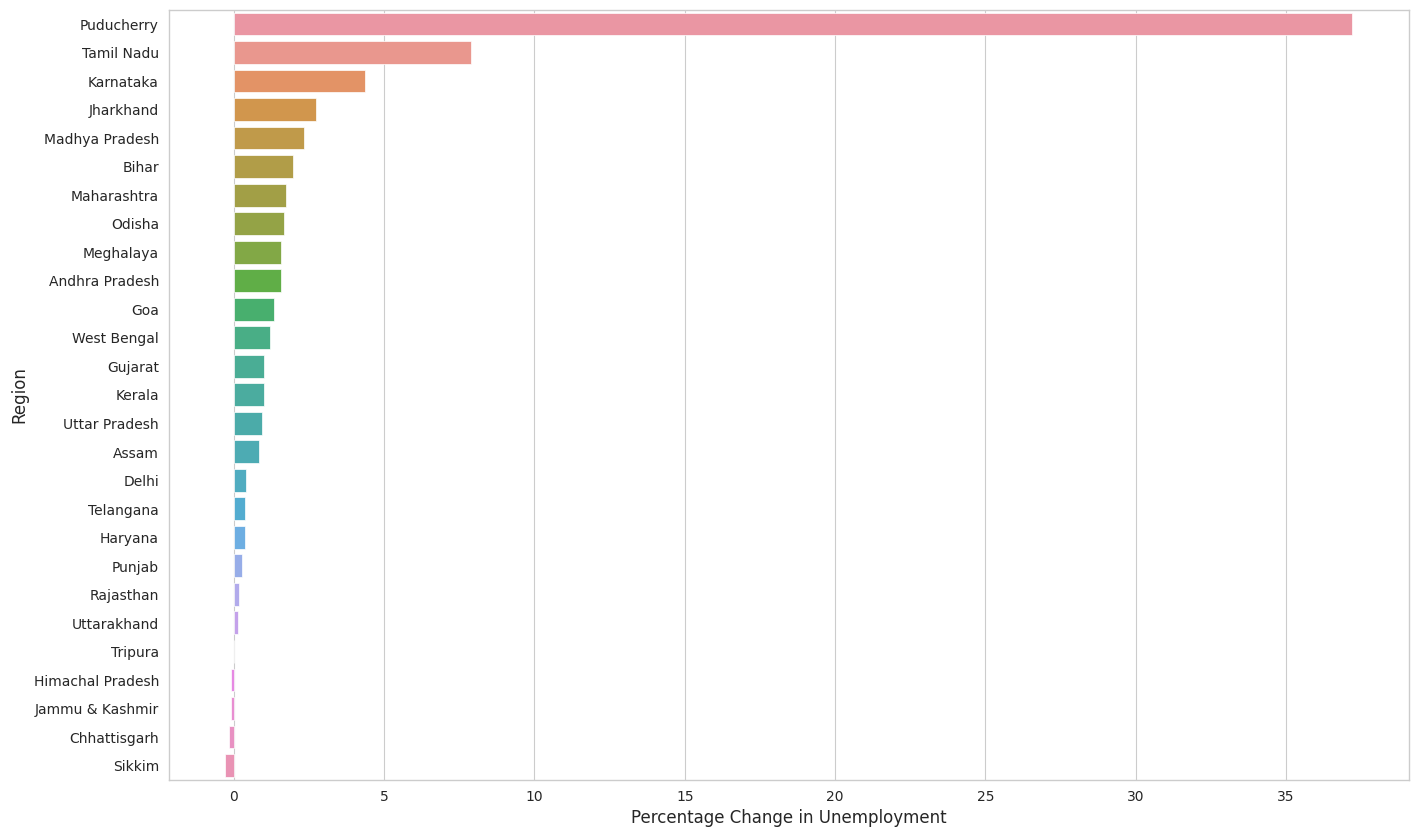

In [41]:
plot_df = before_lock.sort_values('Percentage Change in Unemployment', ascending=False)
plt.figure(figsize=(16, 10))
sns.barplot(data=plot_df, y='Region', x='Percentage Change in Unemployment')

1. If there is positive percentage increase, it means that particular area is most affected by unemployment

2. If there is negative percentage increase, it means that particular area is less impacted by loockdown.

3. From the above visualization, we can infer that Puducherry is highly impacted by unemployment and lockdown.

4. Tripura doesn't get impacted, as it's percentage value is same before and after lockdown.